# Estabilidad interna de oligos

Rychlik (1993) publicó una guía sobre la selección de primers para la Reacción en Cadena de la polimerasa (PCR) donde menciona una gráfica de estabilidad interna para los oligos, la cual puede obtenerse utilizando Oligo 7.

![Stability graph](https://media.springernature.com/lw685/springer-static/image/chp%3A10.1385%2F0-89603-244-2%3A31/MediaObjects/978-1-59259-502-0_2_Fig2_HTML.jpg#center)

Esta gráfica puede ayudarnos a evitar el _mispriming_ (sitios falsos de unión a la secuencia blanco) a partir del valor de $\Delta G$ de los pentámeros del oligo.

al analizar la estabilidad interna. Bucamos que el primer sea estable en el extremo 5' y un poco inestable para el extremo 3'.

- Los primers con in extremo 5' estable son los que tienen un mejor desempeño al reducir los sitios de _mispriming_

- Una baja estabilidad en el extremo 3' previene la formación de duplex que podrían iniciar la síntesis de ADN

El objetivo de esta sesión es poder reproducir esta gráfica con ayuda de python para poder obtener esta gráfica nececitamos

- Dividir la secuencia del primer en pentámeros
- Calcular el valor de $\Delta G$ de cada pentámero
- Graficar la secuencia y los valores correspondientes de $\Delta G$ en cada posición

## Paso 1 obtener los pentámeros de una secuencia dada

Vamos a reproducir la Gráfica B1 con la secuencia `ACTTGGGATTGGGCT`.

Esta secuencia tiene 11 pentámeros:

```
   ACTTGGGATTGGGCT
1. ACTTG
2.  CTTGG
3.   TTGGG
4.    TGGGA
5.     GGGAT
6.      GGATT
7.       GATTG
8.        ATTGG
9.         TTGGG
10.         TGGGC
11.          GGGCT
```
Como podemos observar para obtener todos los posibles pentámeros de la secuencia se necesita avanzar un nucleótido a la vez y extender la selección por 5 nucleótidos.

Esto fácilmente los podemos hacer con un loop


In [ ]:
sequence = "ACTTGGGATTGGGCT"
pentamer_list = []
for i in range(len(sequence)):
  if len(sequence[i:i+5]) < 5:
    break
  pentamer_list.append(sequence[i:i+5])
pentamer_list

['ACTTG',
 'CTTGG',
 'TTGGG',
 'TGGGA',
 'GGGAT',
 'GGATT',
 'GATTG',
 'ATTGG',
 'TTGGG',
 'TGGGC',
 'GGGCT']

Podemos reescribir esto como una lista de comprensión, para crearla necesitamos un formato similar a este 

`[expression for member in iterable]`




In [ ]:
pentamers = [sequence[i:i+5] for i in range(len(sequence)-4)]
pentamers

['ACTTG',
 'CTTGG',
 'TTGGG',
 'TGGGA',
 'GGGAT',
 'GGATT',
 'GATTG',
 'ATTGG',
 'TTGGG',
 'TGGGC',
 'GGGCT']

Ahora que ya tenémos los pentámeros necesitamos calcular el valor de $\Delta G
$ para cada uno. 

Así que ahora nos enfrentamos a que necesitamos conseguír los dímeros un problema similar al de conseguir los pentámeros, así que podríamos hacer una función para obtener ambos y no reescribir el código solo cambiando el valor de la suma de i+2 e i+5 

In [1]:
def get_oligo_kmers(sequence, k):
  """Get all possible substrings of length k contained within a biological sequence  
     
  :param str sequence a text string with a nucleotide sequence
  :param int k an integer representing the frequency k-mer
  :return list a list of all possible k-mers

  Usage examples:
  >>> get_oligo_kmers("ACGAT", 2)
  ['AC', 'CG', 'GA', 'AT']
  >>> get_oligo_kmers("ACTTGGGATTGGGCT", 5)
  ['ACTTG', 'CTTGG', 'TTGGG', 'TGGGA', 'GGGAT', 'GGATT', 'GATTG', 'ATTGG', 'TTGGG', 'TGGGC', 'GGGCT']
  """
  return [sequence[i:i+k] for i in range(len(sequence)) if len(sequence[i:i+k]) == k]

## Paso 2 calcular el valor de $\Delta G$ para un oligo

Para este cálculo el método de Nearest Neighbor ocupa dímeros

```
NearPairsPlus = ['AA','AC','AG','AT',
                 'CA','CC','CG','CT',
                 'GA','GC','GG','GT',
                 'TA','TC','TG','TT']
DeltaG =        [-1.9, -1.3, -1.6, -1.5,
                 -1.9, -3.1, -3.6, -1.6,
                 -1.6, -3.1, -3.1, -1.3,
                 -1.0, -1.6, -1.9, -1.9]
```
Podemos reescribir esto como un diccionario que nos facilite hayar los valores de manera más ágil y así evitar hacerlo revisando los 16 pares en un loop

In [ ]:
near_pairs_delta_g = {'AA': -1.9, 'AC': -1.3, 'AG': -1.6, 'AT': -1.5,
                      'CA': -1.9, 'CC': -3.1, 'CG': -3.6, 'CT': -1.6,
                      'GA': -1.6, 'GC': -3.1, 'GG': -3.1, 'GT': -1.3,
                      'TA': -1.0, 'TC': -1.6, 'TG': -1.9, 'TT': -1.9}
sequence = 'ACTTG'
delta_g = 0.0
for dimer in get_oligo_kmers(sequence, 2):
  delta_g += near_pairs_delta_g.get(dimer)
delta_g

-6.700000000000001

Para poder reutilizar el código, podemos escribir esta función

In [2]:
def get_delta_g(sequence):
  """Obtiene el valor de Delta G para una secuencia de nucleótidos
  
  :param str sequence a text string with a nucleotide sequence
  :return float Delta G value calculated for the nucleotide sequence

  Usage examples:
  >>> get_delta_g('ACTTG')
  -6.700000000000001
  """
  near_pairs_delta_g = {'AA': -1.9, 'AC': -1.3, 'AG': -1.6, 'AT': -1.5,
                        'CA': -1.9, 'CC': -3.1, 'CG': -3.6, 'CT': -1.6,
                        'GA': -1.6, 'GC': -3.1, 'GG': -3.1, 'GT': -1.3,
                        'TA': -1.0, 'TC': -1.6, 'TG': -1.9, 'TT': -1.9}
  return sum([near_pairs_delta_g.get(dimer) for dimer in get_oligo_kmers(sequence, 2)])

print(get_delta_g('ACTTG'))

-6.700000000000001


Ahora podemos combinar estas dos funciones `get_oligo_kmers` y `get_delta_g` para calcular el Delta G de cada uno de los pentámeros de la secuencia.

In [3]:
import re

def get_delta_g_pentamers(sequence):
  """Obtiene el valor de Delta G para cada uno de los pentámeros

  :param srt sequence a text string with A C T G letters for a 
  oligo sequence with more than 5 nucleotides
  :retrun list a list with Delta G value for each perntamer in the oligo

  Usage example:
  get_delta_g_pentamers("TCTTGT")
  [-7.0, -6.7]

  get_delta_g_pentamers("ACTTGGGATTGGGCT")
  [-6.700000000000001, -8.5, -10.0, -9.7, -9.3, -8.1, -6.9, -8.4, -10.0, -11.2, -10.9]

  get_delta_g_pentamers("TAATACGACTCACTATAGGG")
  [-5.4, -5.7, -7.4, -7.5, -7.8, -8.1, -6.1, -6.4, -6.3999999999999995, -6.4, -5.800000000000001, -5.4, -5.1, -5.1, -7.199999999999999, -8.8]
  """
  if not isinstance(sequence,str):
    raise TypeError("sequence  must be a string for an oligonucleotide")
  if len(sequence) < 5:
    raise TypeError("sequence must be a string with more than 5 nucleotides")
  sequence = sequence.upper()
  if not bool(re.compile('^[ACTG]+$').match(sequence)):
    raise ValueError("pentamer must contain only A, C, T, G")
  
  
  return [get_delta_g(pentamer) for pentamer in get_oligo_kmers(sequence, 5)]


print(get_delta_g_pentamers("ACTTGGGATTGGGCT"))


[-6.700000000000001, -8.5, -10.0, -9.7, -9.3, -8.1, -6.9, -8.4, -10.0, -11.2, -10.9]


Ahora podemos graficar el valor de $\Delta G$ de cada uno de los pentámeros con matplotlib

In [16]:
import matplotlib.pyplot as plt


def get_stability_graph(oligo):
    """
       Return a graph of the oligo's pentamers and their deltaG.

       param: oligo: a string of nucleotides
       return: a matplotlib graph
    """

    oligo = oligo.upper()
    pentamers = get_oligo_kmers(oligo, 5)
    delta_g_pentamers = get_delta_g_pentamers(oligo)
    x_labels = list(oligo[0:-5])
    x_labels.append(pentamers[-1])

    plt.plot(delta_g_pentamers, marker='o', linestyle=':', color='b')

    plt.ylabel(r'$\sum \Delta$ G $\left(\frac{kcal}{mol}\right)$ pentamers')
    plt.xticks(range(len(x_labels)), x_labels)
    plt.gca().axes.set_ylim([-12, -5])
    plt.gca().invert_yaxis()
    #plt.savefig('stability_graph.png', bbox_inches='tight')
    plt.show()

Ahora fácilmente podemos obtener la gráfica de estabilidad interna para cada oligo con la función anterior

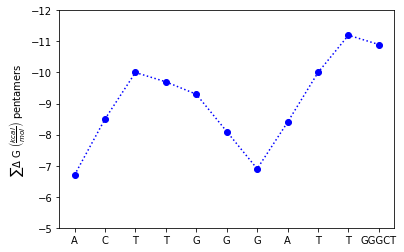

In [17]:
get_stability_graph("ACTTGGGATTGGGCT")